In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [5]:
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

In [7]:
df = pd.read_csv('_csv_hr_comma_sep.csv')
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [8]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [9]:
df.tail()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low
14998,0.37,0.52,2,158,3,0,1,0,support,low


In [10]:
df.shape

(14999, 10)

In [11]:
df.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
sales                    0
salary                   0
dtype: int64

In [12]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [13]:
df['sales'].value_counts()

sales
sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: count, dtype: int64

In [15]:
df.rename(columns={'sales':'department'},inplace=True)
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

In [16]:
df['salary'].value_counts()

salary
low       7316
medium    6446
high      1237
Name: count, dtype: int64

In [18]:
df_num = df.select_dtypes(exclude=['object'])

In [20]:
corr = df_num.corr()
corr.style.background_gradient()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433
Work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245
left,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788
promotion_last_5years,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000


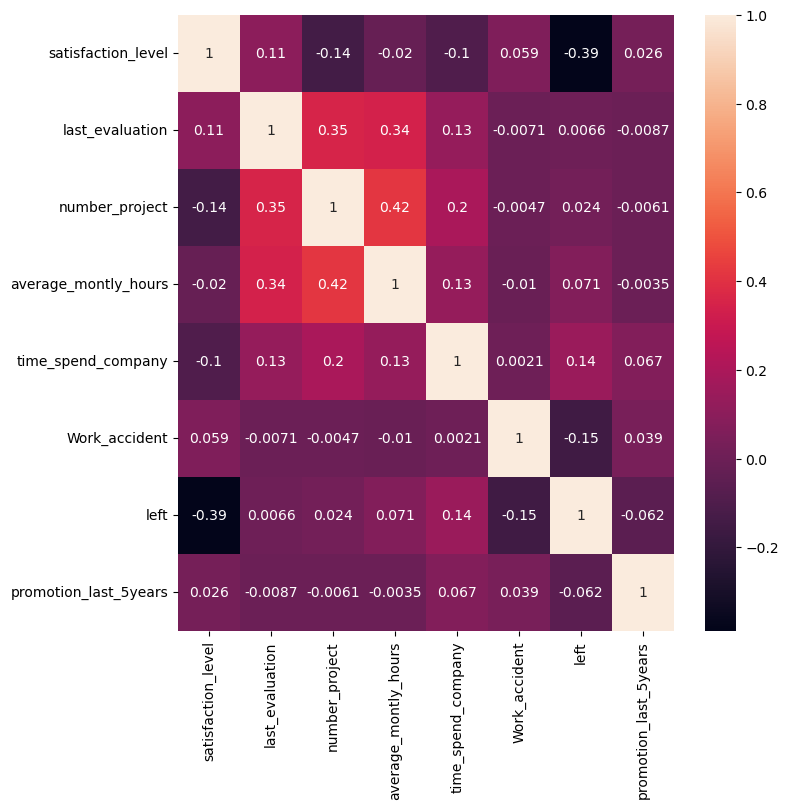

In [22]:
plt.figure(figsize=(8,8))
sns.heatmap(df_num.corr(),annot=True);

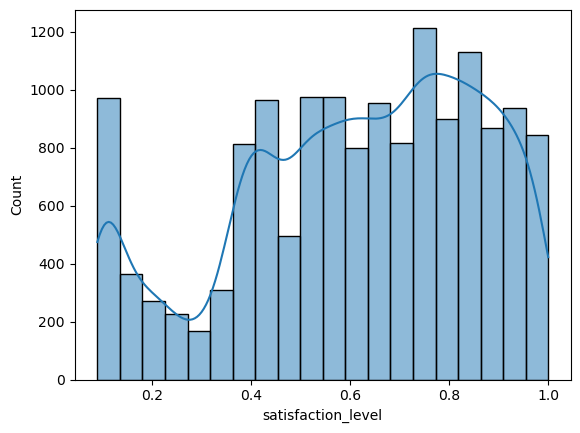

In [24]:
sns.histplot(data = df,x="satisfaction_level", kde = True,bins=20);

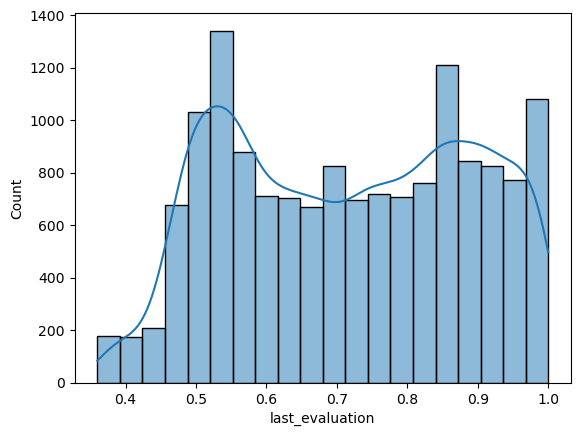

In [25]:
sns.histplot(data = df,x="last_evaluation", kde = True,bins=20);

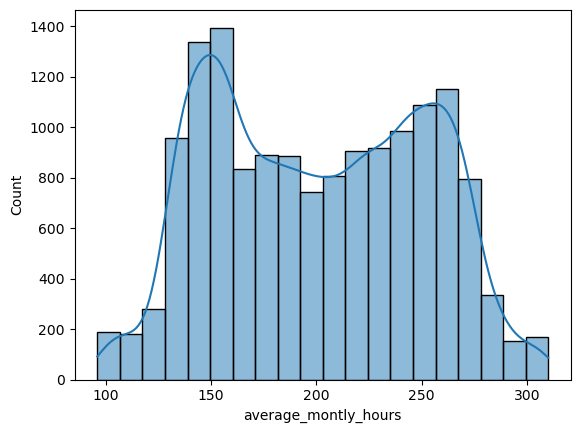

In [26]:
sns.histplot(data = df,x="average_montly_hours", kde = True,bins=20);

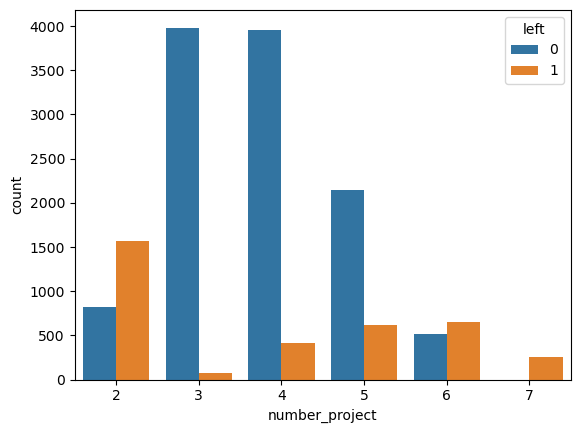

In [27]:
sns.countplot(data=df, x='number_project', hue='left');

Perform clustering of Employees who left based on their satisfaction and evaluation.

In [48]:
X = df.loc[:,['satisfaction_level','last_evaluation','left']]

In [49]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import sklearn.cluster as cluster

In [50]:
K = range(1,12)
wss = []
for k in K:
    km=cluster.KMeans(n_clusters=k,init='k-means++')
    km.fit(X)
    wss_iter =km.inertia_
    wss.append(wss_iter)

Pre-Process the data by converting categorical columns to numerical columns by Applying get_dummies() to the categorical variables.

In [51]:
mycenters = pd.DataFrame({'Clusters' : K, 'WSS' : wss})
mycenters

,Clusters,WSS
0,1,4087.365998
1,2,1226.695361
2,3,867.968167
3,4,634.491362
4,5,492.161149
5,6,364.442902
6,7,275.077326
7,8,207.586501
8,9,179.216281
9,10,158.193569


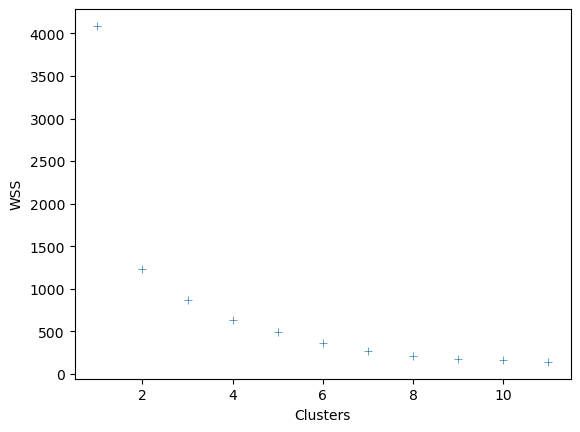

In [53]:
sns.scatterplot(x = 'Clusters', y = 'WSS', data=mycenters, marker='+');

In [65]:
for i in range(2,13):
    labels=cluster.KMeans(n_clusters=i,init='k-means++',random_state=200).fit(X).labels_
    print('Silhouette score for k(clusters) = '+str(i)+' is '
         +str(metrics.silhouette_score(X,labels,metric='euclidean',sample_size=1000,random_state=200)))

Silhouette score for k(clusters) = 2 is 0.6841461688952668
Silhouette score for k(clusters) = 3 is 0.44747149919099943
Silhouette score for k(clusters) = 4 is 0.4502507677833391
Silhouette score for k(clusters) = 5 is 0.42469459456843084
Silhouette score for k(clusters) = 6 is 0.46517852348207783
Silhouette score for k(clusters) = 7 is 0.4750289988903112
Silhouette score for k(clusters) = 8 is 0.4993388952364005
Silhouette score for k(clusters) = 9 is 0.5000613102431384
Silhouette score for k(clusters) = 10 is 0.4973321824138641
Silhouette score for k(clusters) = 11 is 0.49672831346220236
Silhouette score for k(clusters) = 12 is 0.49010085947193033


In [85]:
kmeans = cluster.KMeans(n_clusters=9,init='k-means++')
kmeans = kmeans.fit(df[['left','satisfaction_level','last_evaluation']])

In [71]:
import sklearn.metrics as metrics

In [87]:
df['Clusters'] = kmeans.labels_

In [86]:
sns.scatterplot(x='satisfaction_level', y = 'left',hue='Clusters' ,data = X);

ValueError: Could not interpret value `Clusters` for parameter `hue`

In [ ]:
df.head()

In [ ]:
df.info()

In [ ]:
df['department'].value_counts()

In [ ]:
department = pd.get_dummies(df['department'], prefix='department', prefix_sep='_', drop_first=True)
department

In [ ]:
df['salary'].value_counts()

In [ ]:
salary =  pd.get_dummies(df['salary'], prefix='salary', prefix_sep='_', drop_first=True)
salary

In [ ]:
data = pd.concat([df,department,salary], axis=1)
data.head()

In [ ]:
data = data.drop(['department','salary'],axis=1)
data.shape

In [ ]:
data.head()

In [ ]:
data.info()

Do the stratified split of the dataset to train and test.

In [ ]:
X = data.drop(['left'],axis=1)
y = data['left']

In [ ]:
print(X.shape)
print(y.shape)

In [ ]:
sss = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=123)
sss.get_n_splits(X, y)

In [ ]:
for train,test in sss.split(X,y):     #this will splits the index
    X_train = X.iloc[train]
    y_train = y.iloc[train]
    X_test = X.iloc[test]
    y_test = y.iloc[test]
print(y_train.value_counts())  
print(y_test.value_counts())

In [ ]:
smote = SMOTE(random_state = 11)
X_train, y_train = smote.fit_resample(X_train, y_train)

Train a Logistic Regression model and apply a 5-Fold CV and plot the classification report.

In [ ]:
lr = LogisticRegression(solver='liblinear',multi_class='ovr')
score_lr=cross_val_score(lr,X_train, y_train, cv=5)
print(score_lr)
print("Avg :",np.average(score_lr))

In [ ]:
pred_lr = cross_val_predict(lr, X_test, y_test, cv=5)
pred_lr

In [ ]:
print(classification_report(y_test,pred_lr))

In [ ]:
cm_lr = confusion_matrix(y_test, pred_lr)
disp = ConfusionMatrixDisplay(cm_lr)
disp.plot()

Train a Random Forest Classifier model and apply the 5-Fold CV and plot the classification report.

In [ ]:
rfc = RandomForestClassifier(n_estimators=40)
score_rfc=cross_val_score(rfc,X_train, y_train, cv=5)
print(score_rfc)
print("Avg :",np.average(score_rfc))

In [ ]:
pred_rfc = cross_val_predict(rfc, X_test, y_test, cv=5)
print(classification_report(y_test,pred_rfc))
cm_rfc = confusion_matrix(y_test, pred_rfc)
disp = ConfusionMatrixDisplay(cm_rfc)
disp.plot()

Train a Gradient Boosting Classifier model and apply the 5-Fold CV and plot the classification report.

In [ ]:
gbc = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,max_depth=1, random_state=0)
score_gbc=cross_val_score(gbc,X_train, y_train, cv=5)
print(score_gbc)
print("Avg :",np.average(score_gbc))

In [ ]:
pred_gbc = cross_val_predict(gbc, X_test, y_test, cv=5)
print(classification_report(y_test,pred_gbc))
cm_gbc = confusion_matrix(y_test, pred_gbc)
disp = ConfusionMatrixDisplay(cm_gbc)
disp.plot()

##Based on the confusion matrix,if an employee who might leave the organisation is misclassified as someone who won't leave then proper strategies to retain that person 
##will not be implemented on him or her.Hence Recall is better metric to be used

##Since Random Forest shows the highest accuracy with good f1 score, we will conclude that to be our best performing model

In [ ]:
test_predictions = pd.DataFrame(data=pred_rfc)
test_predictions

In [ ]:
test_predictions.rename(columns={0:'predictions'},inplace=True)
test_predictions.head()

In [ ]:
prob = cross_val_predict(rfc, X_test, y_test, cv=5, method='predict_proba')
# keep probabilities for the positive outcome only
prob = prob[:, 1]
prob

In [ ]:
probability = pd.DataFrame(data=prob)
probability.head()

In [ ]:
probability.rename(columns={0:'probability'},inplace=True)
probability.head()

In [ ]:
len(probability)

In [ ]:
# create a list of our conditions
conditions = [
    (probability['probability'] <= 0.2),
    (probability['probability'] > 0.2) & (probability['probability'] <= 0.6),
    (probability['probability'] > 0.6) & (probability['probability'] <= 0.9),
    (probability['probability'] > 0.9)
    ]

# create a list of the values we want to assign for each condition
values = ['Safe Zone (Green)', 'Low Risk Zone (Yellow)', 'Medium Risk Zone (Orange)', 'High Risk Zone (Red)']

# create a new column and use np.select to assign values to it using our lists as arguments
probability['zone'] = np.select(conditions, values)

# display updated DataFrame
probability.head()

In [ ]:
print(X_test.shape)
print(test_predictions.shape)
print(probability.shape)

In [ ]:
X_test = X_test.reset_index()

In [ ]:
new_test_df = pd.concat([X_test,test_predictions,probability], axis=1)
new_test_df.head()

In [ ]:
new_test_df['zone'].value_counts()

In [ ]:
new_test_df['zone'].value_counts()/len(new_test_df)

In [ ]:
colors = {'High Risk Zone (Red)':'red', 'Safe Zone (Green)':'green', 'Medium Risk Zone (Orange)':'orange', 'Low Risk Zone (Yellow)':'yellow'}
sns.countplot(data=new_test_df, x='number_project', hue='zone', palette= colors)

In [ ]:
new_test_df['promotion_last_5years'].value_counts()

In [ ]:
sns.countplot(data=new_test_df, x='promotion_last_5years', hue='zone', palette= colors)

In [ ]:
sns.countplot(data=new_test_df, x='time_spend_company', hue='zone', palette= colors)

In [ ]:
plt.figure(figsize=(12,6))
sns.swarmplot(data=new_test_df, x='zone', y='average_montly_hours')

In [ ]:
plt.figure(figsize=(12,6))
sns.violinplot(x="zone",y="average_montly_hours",data=new_test_df, inner="box", palette=colors, cut=2, linewidth=1)

##Overview based on 'average_montly_hours' :

From above plot, we can clearly say that employees who worked less than 160 Hrs were most likely to quit.
Also, the employees who worked more than 220 Hrs on an average were at medium risk of quiting the company.
However, Employees who worked 200 Hrs mothly on an average were pretty happy and did not quit from the company.

In [ ]:
plt.figure(figsize=(12,6))
sns.violinplot(x="zone",y="satisfaction_level",data=new_test_df, inner="box", palette=colors, cut=2, linewidth=1)

Overview based on 'satisfaction_level' :

From above plot, we can clearly say that employees with satisfaction level less than 0.4 were most likely to leave the company.
Also, employees with satisfaction level of 0.6 were happy at the company and will not quit.
But also, employees with satisfaction level of 0.8 and higher had some chance of quiting.

In [ ]:
sns.countplot(data=new_test_df, x='salary_low', hue='zone', palette= colors)

In [ ]:
sns.countplot(data=new_test_df, x='salary_medium', hue='zone', palette= colors)

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(data=df, x='salary', hue='left')

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(data=df, x='department', hue='left')

In [ ]:
sns.countplot(data=new_test_df, x='department_sales', hue='zone', palette= colors)

Overview based on 'salary' and 'department' :

Both, these categories don't provide clear pattern on employee action.
Although, employees with low and medium salary had more chance of quitting than others.
Similarly, employees who belongs to sales, technical and support departments are more prone to leaving the company.